**ETHEREUM PRICE PREDICTION**

**IMPORING NECESSARY LIBRARIES AND RELEVANT PACKAGES**

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras import models
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import SimpleRNN
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

**LOADING DATASET**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ETH-USD_train.csv to ETH-USD_train (3).csv


In [3]:
dataset_train = pd.read_csv("ETH-USD_train.csv")

In [4]:
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,755.757019,782.530029,742.004028,772.640991,772.640991,2595760128
1,2018-01-02,772.346008,914.830017,772.346008,884.443970,884.443970,5783349760
2,2018-01-03,886.000000,974.471008,868.450989,962.719971,962.719971,5093159936
3,2018-01-04,961.713013,1045.079956,946.085999,980.921997,980.921997,6502859776
4,2018-01-05,975.750000,1075.390015,956.325012,997.719971,997.719971,6683149824
...,...,...,...,...,...,...,...
725,2019-12-27,126.368797,128.097565,124.820808,127.214607,127.214607,8299390176
726,2019-12-28,127.213013,130.258163,126.899696,128.322708,128.322708,8069298610
727,2019-12-29,128.266876,136.811203,127.997658,134.757980,134.757980,9708776786
728,2019-12-30,134.796524,136.757355,131.545563,132.633484,132.633484,9796951716


**PLOTTING OPENING PRICE AND CLOSING PRICE FOR BETTER VISUALIZATION AND UNDERSTANDING**

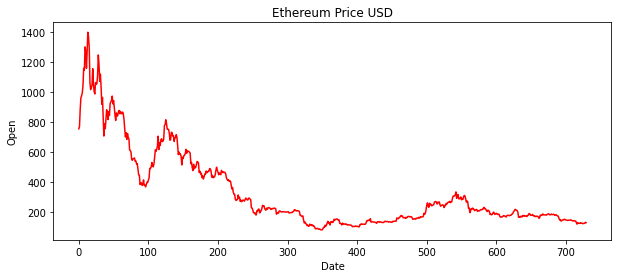

In [5]:
dataset_train.dropna()
plt.figure(figsize=(10, 4))
plt.title("Ethereum Price USD")
plt.xlabel("Date")
plt.ylabel("Open")
plt.plot(dataset_train["Open"], color='Red')
plt.show()

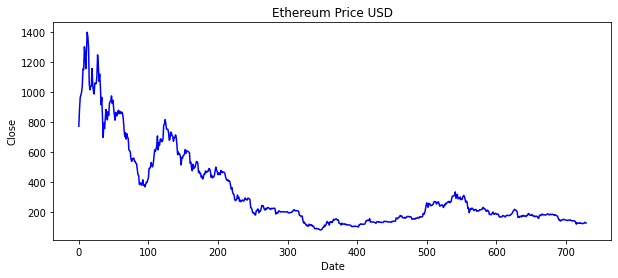

In [6]:
dataset_train.dropna()
plt.figure(figsize=(10, 4))
plt.title("Ethereum Price USD")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(dataset_train["Close"], color='Blue')
plt.show()

**LETS WORK ON OPENING PRICE**

In [90]:
training_set = dataset_train.iloc[:,1:2].values
training_set.shape

(730, 1)

**Feature Scaling using Min Max Scaler, Scaling is done to bring the attributes in same dimensions**

In [91]:
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled.shape

(730, 1)

In [92]:
x_train = []
y_train = []
for i in range (1,729):
  x_train.append(training_set_scaled[i-1:i,0])
  y_train.append(training_set_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(728, 1)

**x_train.shape[0] tell rows and x_train.shape[1] tells about column and 1 indicates giving 1 element in array**

In [93]:
x_train = np.reshape(x_train,(x_train.shape[0],  x_train.shape[1],1))
x_train.shape

(728, 1, 1)

**RNN MODEL BUILDING**

In [11]:
#Initializing RNN
regressor = tf.keras.Sequential()

In [12]:
#Adding first LSTM layer 
regressor.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [13]:
#Adding second LSTM layer 
regressor.add(SimpleRNN(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [14]:
#Adding Third LSTM layer 
regressor.add(SimpleRNN(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [15]:
#Adding Fourth LSTM layer 
regressor.add(SimpleRNN(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(Dense(1, activation='linear'))

In [17]:
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.09)

In [18]:
#Compiling RNN
regressor.compile(optimizer = "adam", loss ="mean_squared_error")

FITTING RNN MODEL

In [19]:
history = regressor.fit (x_train,y_train, epochs = 25, batch_size= 32 )

Epoch 1/25
23/23 [==============================] - 4s 7ms/step - loss: 0.0194
Epoch 2/25
23/23 [==============================] - 0s 6ms/step - loss: 0.0096
Epoch 3/25
23/23 [==============================] - 0s 6ms/step - loss: 0.0064
Epoch 4/25
23/23 [==============================] - 0s 6ms/step - loss: 0.0059
Epoch 5/25
23/23 [==============================] - 0s 6ms/step - loss: 0.0052
Epoch 6/25
23/23 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 7/25
23/23 [==============================] - 0s 6ms/step - loss: 0.0039
Epoch 8/25
23/23 [==============================] - 0s 6ms/step - loss: 0.0043
Epoch 9/25
23/23 [==============================] - 0s 6ms/step - loss: 0.0046
Epoch 10/25
23/23 [==============================] - 0s 6ms/step - loss: 0.0048
Epoch 11/25
23/23 [==============================] - 0s 6ms/step - loss: 0.0037
Epoch 12/25
23/23 [==============================] - 0s 6ms/step - loss: 0.0044
Epoch 13/25
23/23 [==============================

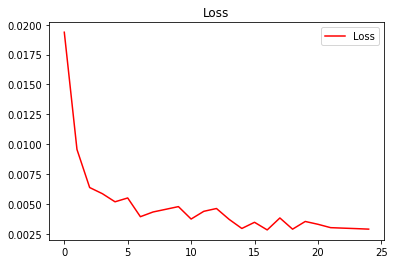

In [20]:
plt.title('Loss')
plt.plot(history.history['loss'], label='Loss', color='Red')
plt.legend()
plt.show()

**LOADING TEST DATA 1**

In [21]:
from google.colab import files
uploaded = files.upload()

Saving ETH-USD_test_1.csv to ETH-USD_test_1 (3).csv


In [22]:
dataset_test_1 = pd.read_csv("ETH-USD_test_1.csv")

In [23]:
dataset_test_1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,129.630661,132.835358,129.198288,130.802002,130.802002,7935230330
1,2020-01-02,130.820038,130.820038,126.954910,127.410179,127.410179,8032709256
2,2020-01-03,127.411263,134.554016,126.490021,134.171707,134.171707,10476845358
3,2020-01-04,134.168518,136.052719,133.040558,135.069366,135.069366,7430904515
4,2020-01-05,135.072098,139.410202,135.045624,136.276779,136.276779,7526675353
...,...,...,...,...,...,...,...
86,2020-03-27,138.369934,139.902695,133.937943,133.937943,133.937943,11396286629
87,2020-03-28,134.032745,134.032745,126.962189,130.986496,130.986496,12162403960
88,2020-03-29,131.015335,131.174088,125.450050,125.583733,125.583733,9938133669
89,2020-03-30,125.577896,133.911469,125.289680,132.904541,132.904541,11841123306


In [94]:
real_stock_values_1 = dataset_test_1.iloc[:,1:2].values
real_stock_values_1.shape

(91, 1)

In [37]:
real_stock_values_1.shape

(91, 1)

In [39]:
dataset_total_1 = pd.concat((dataset_train["Open"], dataset_test_1["Open"]), axis=0)
inputs = dataset_total_1[len(dataset_total_1) - len(dataset_test_1)-1:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test =[]

for i in range (1,92):
  x_test.append(inputs[i-1:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [40]:
predicted_stock_price
predicted_stock_price.shape

(91, 1)

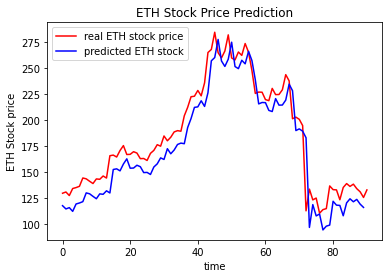

In [34]:
#Visualize the predictions and see where our model stands and how far off we are 
plt.plot(real_stock_values_1, color='red', label = 'real ETH stock price')
plt.plot(predicted_stock_price, color='blue', label ='predicted ETH stock')
plt.title("ETH Stock Price Prediction")
plt.xlabel("time")
plt.ylabel("ETH Stock price")
plt.legend()
plt.show()

In [41]:
RMSE = math.sqrt(mean_squared_error(real_stock_values_1,predicted_stock_price))
print("Total model error is: ",RMSE)

Total model error is:  18.27382878730733


**LOADING TEST DATA 2**

In [42]:
from google.colab import files
uploaded = files.upload()

Saving ETH-USD_test_2.csv to ETH-USD_test_2 (2).csv


In [43]:
dataset_test_2 = pd.read_csv("ETH-USD_test_2.csv")

In [44]:
dataset_test_2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-01,133.612320,135.634552,129.730942,135.634552,135.634552,1.245656e+10
1,2020-04-02,135.732178,146.787094,135.732178,142.029144,142.029144,1.532286e+10
2,2020-04-03,142.110458,146.899872,139.619385,142.091309,142.091309,1.318460e+10
3,2020-04-04,142.215179,145.377304,140.121826,145.219391,145.219391,1.194666e+10
4,2020-04-05,145.261017,146.128525,142.102081,143.546646,143.546646,1.128099e+10
...,...,...,...,...,...,...,...
86,2020-06-26,232.877487,233.901932,229.259460,229.668045,229.668045,7.187490e+09
87,2020-06-27,229.631485,232.493423,220.564575,222.959793,222.959793,6.918381e+09
88,2020-06-28,222.914490,228.598282,219.472672,225.347168,225.347168,6.205926e+09
89,2020-06-29,225.361435,229.903214,222.254990,228.194870,228.194870,6.726165e+09


In [51]:
real_stock_values_2 = dataset_test_2.iloc[:,1:2].values
real_stock_values_2
real_stock_values_2.shape

(91, 1)

In [52]:
dataset_total = pd.concat((dataset_train["Open"], dataset_test_2["Open"]), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test_2)-1:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test =[]

for i in range (1,92):
  x_test.append(inputs[i-1:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [53]:
predicted_stock_price
predicted_stock_price.shape

(91, 1)

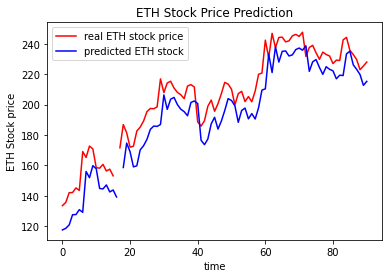

In [54]:
#Visualize the predictions and see where our model stands and how far off we are 
plt.plot(real_stock_values_2, color='red', label = 'real ETH stock price')
plt.plot(predicted_stock_price, color='blue', label ='predicted ETH stock')
plt.title("ETH Stock Price Prediction")
plt.xlabel("time")
plt.ylabel("ETH Stock price")
plt.legend()
plt.show()

**BUILDING MODEL FOR LSTM**

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
from google.colab import files
uploaded = files.upload()

Saving ETH-USD_train.csv to ETH-USD_train (4).csv


In [95]:
  dataset_train = pd.read_csv("ETH-USD_train (4).csv")
  dataset_train
  training_set = dataset_train.iloc[:,1:2].values
  training_set.shape

(730, 1)

In [96]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled.shape

(730, 1)

In [97]:
x_train = []
y_train = []
for i in range (1,729):
  x_train.append(training_set_scaled[i-1:i,0])
  y_train.append(training_set_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(728, 1)

In [98]:
x_train = np.reshape(x_train,(x_train.shape[0],  x_train.shape[1],1))
x_train.shape

(728, 1, 1)

**BUILDING LSTM MODEL**

In [63]:
regressor = tf.keras.Sequential()

In [64]:
#Adding first LSTM layer 
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [65]:
#Adding second LSTM layer 
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [66]:
#Adding Third LSTM layer 
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [67]:
#Adding Fourth LSTM layer 
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [68]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [69]:
regressor.add(Dense(1, activation='linear'))

In [70]:
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.09)
#Compiling RNN
regressor.compile(optimizer = "adam", loss ="mean_squared_error")

In [71]:
history = regressor.fit (x_train,y_train, epochs = 25, batch_size= 32 )

Epoch 1/25
23/23 [==============================] - 10s 10ms/step - loss: 0.0632
Epoch 2/25
23/23 [==============================] - 0s 10ms/step - loss: 0.0412
Epoch 3/25
23/23 [==============================] - 0s 11ms/step - loss: 0.0360
Epoch 4/25
23/23 [==============================] - 0s 11ms/step - loss: 0.0258
Epoch 5/25
23/23 [==============================] - 0s 11ms/step - loss: 0.0060
Epoch 6/25
23/23 [==============================] - 0s 11ms/step - loss: 0.0037
Epoch 7/25
23/23 [==============================] - 0s 12ms/step - loss: 0.0029
Epoch 8/25
23/23 [==============================] - 0s 12ms/step - loss: 0.0021
Epoch 9/25
23/23 [==============================] - 0s 11ms/step - loss: 0.0024
Epoch 10/25
23/23 [==============================] - 0s 12ms/step - loss: 0.0022
Epoch 11/25
23/23 [==============================] - 0s 12ms/step - loss: 0.0016
Epoch 12/25
23/23 [==============================] - 0s 11ms/step - loss: 0.0022
Epoch 13/25
23/23 [=================

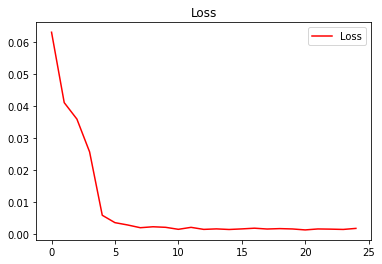

In [72]:
plt.title('Loss')
plt.plot(history.history['loss'], label='Loss', color='Red')
plt.legend()
plt.show()

**LOADING TEST DATA 1**

In [73]:
dataset_test = pd.read_csv("ETH-USD_test_1.csv")
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,129.630661,132.835358,129.198288,130.802002,130.802002,7935230330
1,2020-01-02,130.820038,130.820038,126.954910,127.410179,127.410179,8032709256
2,2020-01-03,127.411263,134.554016,126.490021,134.171707,134.171707,10476845358
3,2020-01-04,134.168518,136.052719,133.040558,135.069366,135.069366,7430904515
4,2020-01-05,135.072098,139.410202,135.045624,136.276779,136.276779,7526675353
...,...,...,...,...,...,...,...
86,2020-03-27,138.369934,139.902695,133.937943,133.937943,133.937943,11396286629
87,2020-03-28,134.032745,134.032745,126.962189,130.986496,130.986496,12162403960
88,2020-03-29,131.015335,131.174088,125.450050,125.583733,125.583733,9938133669
89,2020-03-30,125.577896,133.911469,125.289680,132.904541,132.904541,11841123306


In [74]:
real_stock_values = dataset_test.iloc[:,1:2].values
real_stock_values.shape

(91, 1)

In [78]:
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-1:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test =[]

for i in range (1,92):
  x_test.append(inputs[i-1:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [79]:
predicted_stock_price.shape

(91, 1)

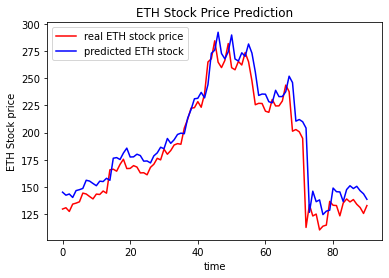

In [80]:
#Visualize the predictions and see where our model stands and how far off we are 
plt.plot(real_stock_values, color='red', label = 'real ETH stock price')
plt.plot(predicted_stock_price, color='blue', label ='predicted ETH stock')
plt.title("ETH Stock Price Prediction")
plt.xlabel("time")
plt.ylabel("ETH Stock price")
plt.legend()
plt.show()

In [81]:
RMSE = math.sqrt(mean_squared_error(real_stock_values,predicted_stock_price))
print("Total model error is: ",RMSE)

Total model error is:  16.53464686501529


**LOADING TEST DATA 2**

In [82]:
dataset_test_2 = pd.read_csv("ETH-USD_test_2.csv")
dataset_test_2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-01,133.612320,135.634552,129.730942,135.634552,135.634552,1.245656e+10
1,2020-04-02,135.732178,146.787094,135.732178,142.029144,142.029144,1.532286e+10
2,2020-04-03,142.110458,146.899872,139.619385,142.091309,142.091309,1.318460e+10
3,2020-04-04,142.215179,145.377304,140.121826,145.219391,145.219391,1.194666e+10
4,2020-04-05,145.261017,146.128525,142.102081,143.546646,143.546646,1.128099e+10
...,...,...,...,...,...,...,...
86,2020-06-26,232.877487,233.901932,229.259460,229.668045,229.668045,7.187490e+09
87,2020-06-27,229.631485,232.493423,220.564575,222.959793,222.959793,6.918381e+09
88,2020-06-28,222.914490,228.598282,219.472672,225.347168,225.347168,6.205926e+09
89,2020-06-29,225.361435,229.903214,222.254990,228.194870,228.194870,6.726165e+09


In [83]:
real_stock_values_2 = dataset_test_2.iloc[:,1:2].values
real_stock_values_2.shape

(91, 1)

In [86]:
dataset_total = pd.concat((dataset_train["Open"], dataset_test_2["Open"]), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test_2)-1:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test =[]

for i in range (1,92):
  x_test.append(inputs[i-1:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [87]:
predicted_stock_price.shape

(91, 1)

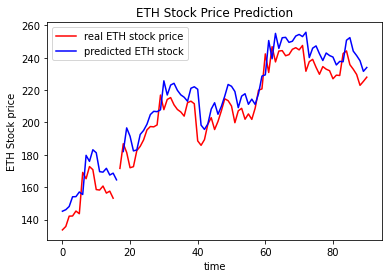

In [88]:
#Visualize the predictions and see where our model stands and how far off we are 
plt.plot(real_stock_values_2, color='red', label = 'real ETH stock price')
plt.plot(predicted_stock_price, color='blue', label ='predicted ETH stock')
plt.title("ETH Stock Price Prediction")
plt.xlabel("time")
plt.ylabel("ETH Stock price")
plt.legend()
plt.show()

**FACEBOOK PROPHET MODEL**

In [70]:
import pandas as pd 
from fbprophet import Prophet

In [71]:
df= pd.read_csv('ETH-USD_train.csv')

In [72]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,755.757019,782.530029,742.004028,772.640991,772.640991,2595760128
1,2018-01-02,772.346008,914.830017,772.346008,884.443970,884.443970,5783349760
2,2018-01-03,886.000000,974.471008,868.450989,962.719971,962.719971,5093159936
3,2018-01-04,961.713013,1045.079956,946.085999,980.921997,980.921997,6502859776
4,2018-01-05,975.750000,1075.390015,956.325012,997.719971,997.719971,6683149824
...,...,...,...,...,...,...,...
725,2019-12-27,126.368797,128.097565,124.820808,127.214607,127.214607,8299390176
726,2019-12-28,127.213013,130.258163,126.899696,128.322708,128.322708,8069298610
727,2019-12-29,128.266876,136.811203,127.997658,134.757980,134.757980,9708776786
728,2019-12-30,134.796524,136.757355,131.545563,132.633484,132.633484,9796951716


In [74]:
df = df[["Date", "Open"]]
df

,Date,Open
0,2018-01-01,755.757019
1,2018-01-02,772.346008
2,2018-01-03,886.000000
3,2018-01-04,961.713013
4,2018-01-05,975.750000
...,...,...
725,2019-12-27,126.368797
726,2019-12-28,127.213013
727,2019-12-29,128.266876
728,2019-12-30,134.796524


In [75]:
df.columns = ["ds", "y"]
df

,ds,y
0,2018-01-01,755.757019
1,2018-01-02,772.346008
2,2018-01-03,886.000000
3,2018-01-04,961.713013
4,2018-01-05,975.750000
...,...,...
725,2019-12-27,126.368797
726,2019-12-28,127.213013
727,2019-12-29,128.266876
728,2019-12-30,134.796524


In [77]:
prophet = Prophet()
prophet.fit(df)
future = prophet.make_future_dataframe(periods=180)
print(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds
0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
..         ...
905 2020-06-24
906 2020-06-25
907 2020-06-26
908 2020-06-27
909 2020-06-28

[910 rows x 1 columns]


In [78]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].head(200)

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,1145.424098,1059.372567,1229.550784
1,2018-01-02,1136.472075,1050.971544,1218.357975
2,2018-01-03,1129.625112,1043.978198,1214.129987
3,2018-01-04,1122.181171,1042.304968,1212.837597
4,2018-01-05,1115.408401,1026.687875,1203.010393
...,...,...,...,...
195,2018-07-15,442.701226,361.584250,530.427407
196,2018-07-16,437.251287,351.238019,523.038149
197,2018-07-17,431.549539,353.213142,520.229340
198,2018-07-18,427.952850,343.614252,509.669756


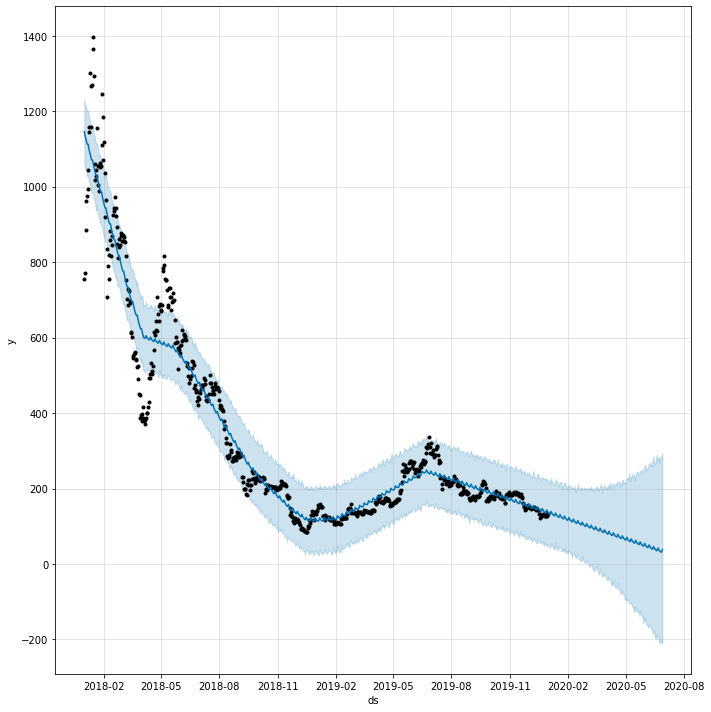

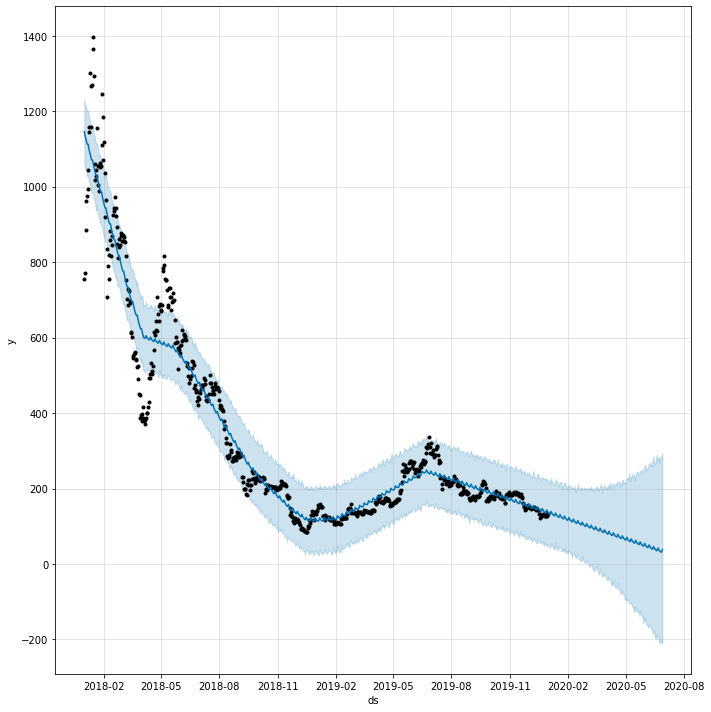

In [79]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(10,10))